<a href="https://colab.research.google.com/github/Walbyq/data-science/blob/main/heart-attack/heart-attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# Подготовка данных

Подключаемся к Google Drive:

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Получаем датафрейм:

In [53]:
csv_file_path = '/content/drive/MyDrive/ML/datasets/heart.csv'
df = pd.read_csv(csv_file_path)

# Настройка стилей

Настройка палитры:

In [397]:
# Установка стиля
sns.set_style('darkgrid')

# Настройка палитры
color_mod = 'coolwarm'
full_palette = sns.color_palette(color_mod, 6)
palette = [full_palette[0], full_palette[-1]]
sns.set_palette(palette)

Палитра для тепловой карты:

In [398]:
sns.color_palette(color_mod)

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

Палитра для графиков:

In [399]:
sns.color_palette(palette)

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

# Анализ данных

## Основная информация

Столбцы датафрейма:

*   **age** - возраст пациента;
*   **sex** - пол пациента:
    *   0: женский;
    *   1: мужской;
*   **cp** - тип боли в груди:
    *   1: типичная стенокардия;
    *   2: атипичная стенокардия;
    *   З: боль, не связанная со стенокардией;
    *   4: не обнаружено симптомов;
*   **trtbps** - давление в состоянии покоя в мм рт. ст;
*   **chol**  - холестерин в мг/дл, полученный с помощью датчика ИМТ;
*   **fbs** - уровень сахара в крови при голоде > 120 мг/дл (0: нет; 1: да);
*   **restecg** - результаты электрокардиографических исследований в режиме отдыха:
    *   0: нормальное;
    *   1: наличие аномалии ST-T волны (инверсии T-волн и/или подъема ST или депрессия > 0,05 мВ);
    *   2: показанная вероятная или определенная левая желудочковая гипертрофия по критериям Эстеса;
*   **thalachh** - максимальная достигнутая частота сердцебиения;
*   **exng** - стенокардия, вызванная физической нагрузкой (0: нет; 1: да);
*   **oldpeak** - показатель депрессии сегмента ST;
*   **slp** - наклон сегмента ST на электрокардиограмме:
    *   0: нисходящий наклон;
    *   1: плоский наклон;
    *   2: восходящий наклон;
*   **caa** - число крупных судов (0-3);
*   **thall** - результат талиевого стресс-теста:
    *   0: нормальный результат;
    *   1: фиксированный дефект;
    *   2: обратимый дефект;
    *   3: комбинированный дефект (фиксированный и обратимый);
*   **output** - вероятность сердечного приступа (0: нет; 1: да).

Перевод столбцов датафрейма:

In [400]:
feature_labels = {
    'age': 'Возраст',
    'sex': 'Пол',
    'cp': 'Тип боли в груди',
    'trtbps': 'Артериальное давление',
    'chol': 'Холестерин',
    'fbs': 'Повышенный сахар',
    'restecg': 'ЭКГ',
    'thalachh': 'Макс. ЧСС',
    'exng': 'Вызванная стенокардия',
    'oldpeak': 'Депрессия ST',
    'slp': 'Наклон ST на ЭКГ',
    'caa': 'Число крупных сосудов',
    'thall': 'Результат талиевого стресс-теста',
    'output': 'Вероятность инфаркта'
}

Выводим размерность:

In [401]:
df.shape

(303, 14)

Выводим первые 5 значений:

In [402]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Выводим основные статистические характеристики данных по каждому числовому признаку:

In [403]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Выводим основную информацию:

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Выводим количество пустых значений в каждом столбце:

In [405]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


## Тепловая карта по матрице корреляции

Корреляция указывает на степень взаимосвязи между двумя переменными. Она помогает понять, как одна переменная изменяется по отношению к другой. Значение варьируется от -1 до 1, где:

*   1 указывает на полную положительную корреляцию;
*   -1 указывает на полную отрицательную корреляцию;
*   0 указывает на отсутствие корреляции.

<Axes: >

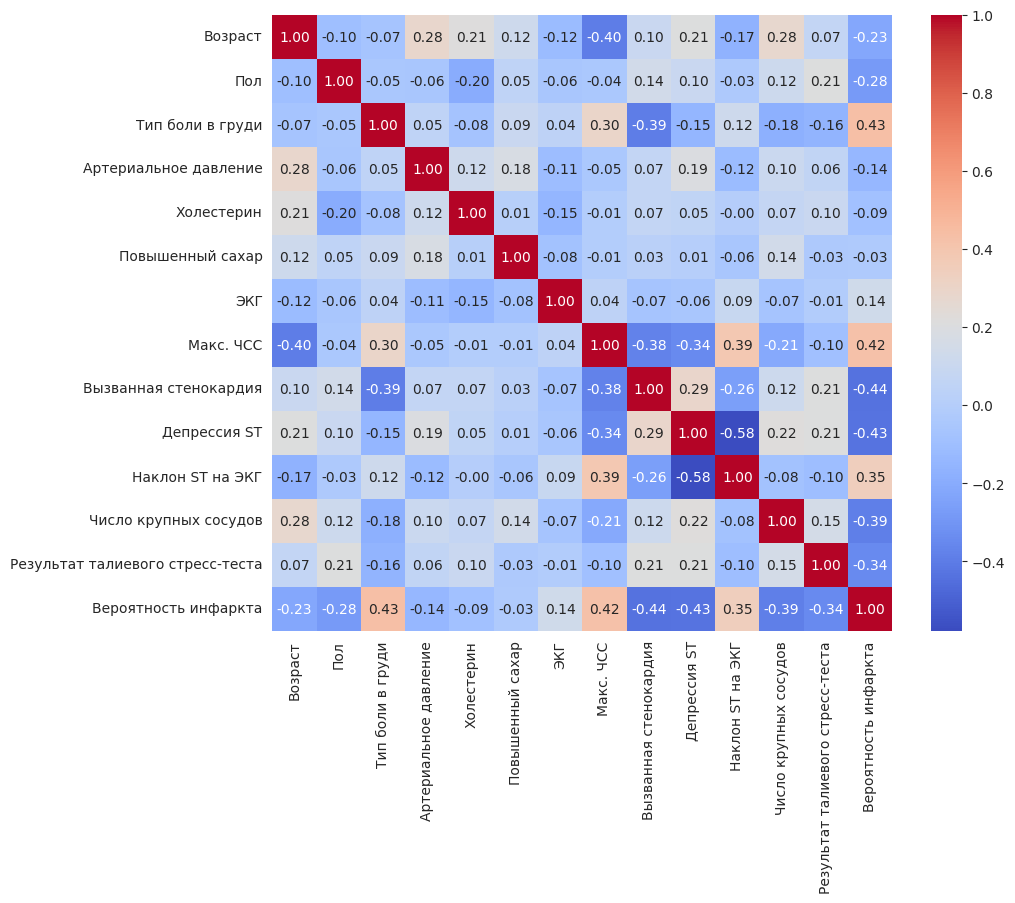

In [415]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True),
            xticklabels=list(feature_labels.values()),
            yticklabels=list(feature_labels.values()),
            annot=True,
            cmap=color_mod,
            fmt='.2f')

## Гистограммы и диаграммы

### Числовые признаки

Левая колонка графиков показывает гистограммы распределения для каждого параметра. Они отображают, как часто встречаются различные значения каждого параметра в наборе данных.

Правая колонка графиков показывает диаграммы размаха, которые визуализируют взаимосвязь вероятности возникновения инфаркта от различных факторов.

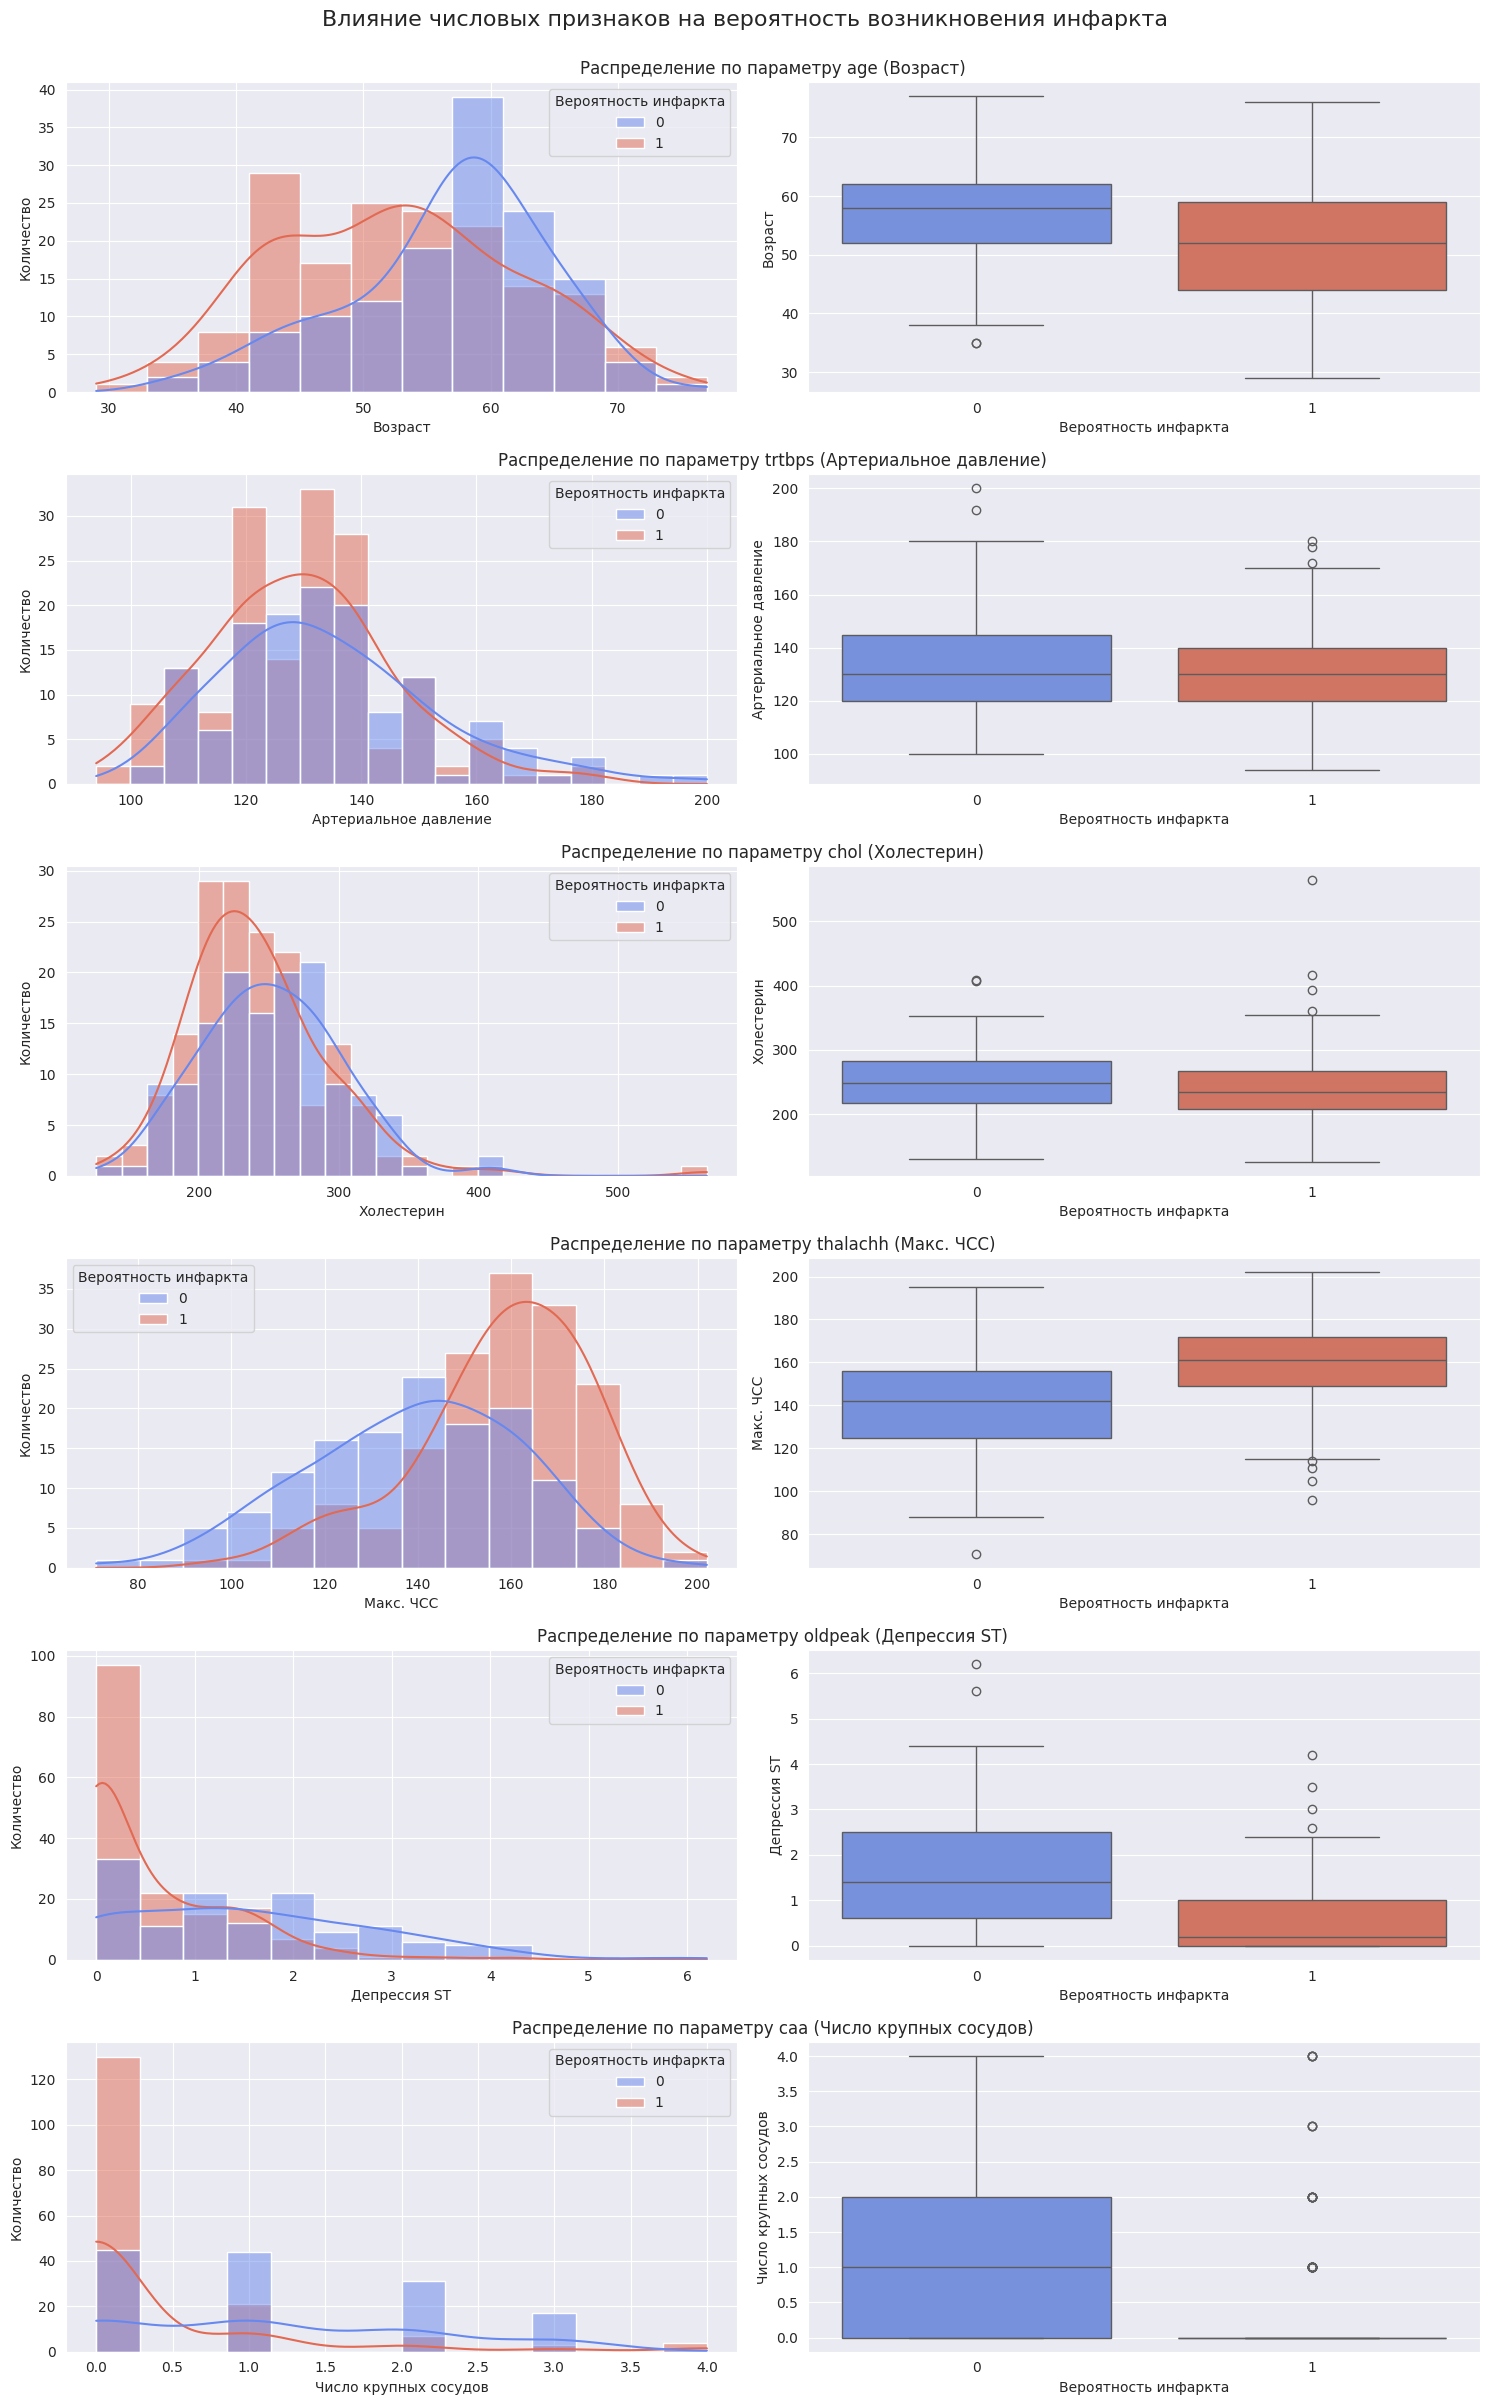

In [407]:
# Определяем числовые признаки
numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']

# Создаем подграфики
fig, axes = plt.subplots(len(numeric_features), 2, figsize=(15, 4*len(numeric_features)))
fig.suptitle('Влияние числовых признаков на вероятность возникновения инфаркта', fontsize=16, y=1)

for i, feature in enumerate(numeric_features):
    # Создаем подграфик для каждой пары
    subfig = fig.add_subplot(len(numeric_features), 1, i+1)
    subfig.set_title(f'Распределение по параметру {feature} ({feature_labels[feature]})')
    subfig.axis('off')  # Отключаем оси для подграфика

    # Гистограмма
    sns.histplot(df, x=feature, hue='output', kde=True, ax=axes[i, 0])
    axes[i, 0].set_xlabel(feature_labels[feature])
    axes[i, 0].set_ylabel('Количество')

    # Диаграмма размаха
    sns.boxplot(df, x='output', y=feature, hue='output', ax=axes[i, 1])
    axes[i, 1].set_xlabel('Вероятность инфаркта')
    axes[i, 1].set_ylabel(feature_labels[feature])

    # Настраиваем легенды
    legend = axes[i, 0].get_legend()
    legend.set_title('Вероятность инфаркта')
    for text in legend.get_texts():
        text.set_text(text.get_text())
    axes[i, 1].get_legend().remove()

plt.tight_layout()
plt.show()

### Категориальные признаки

Столбчатые диаграммы отображают соотношение пациентов с высокой и низкой вероятностью инфаркта для каждого значения категориального признака, позволяя сравнить количество пациентов в разных категориях и их риск инфаркта.

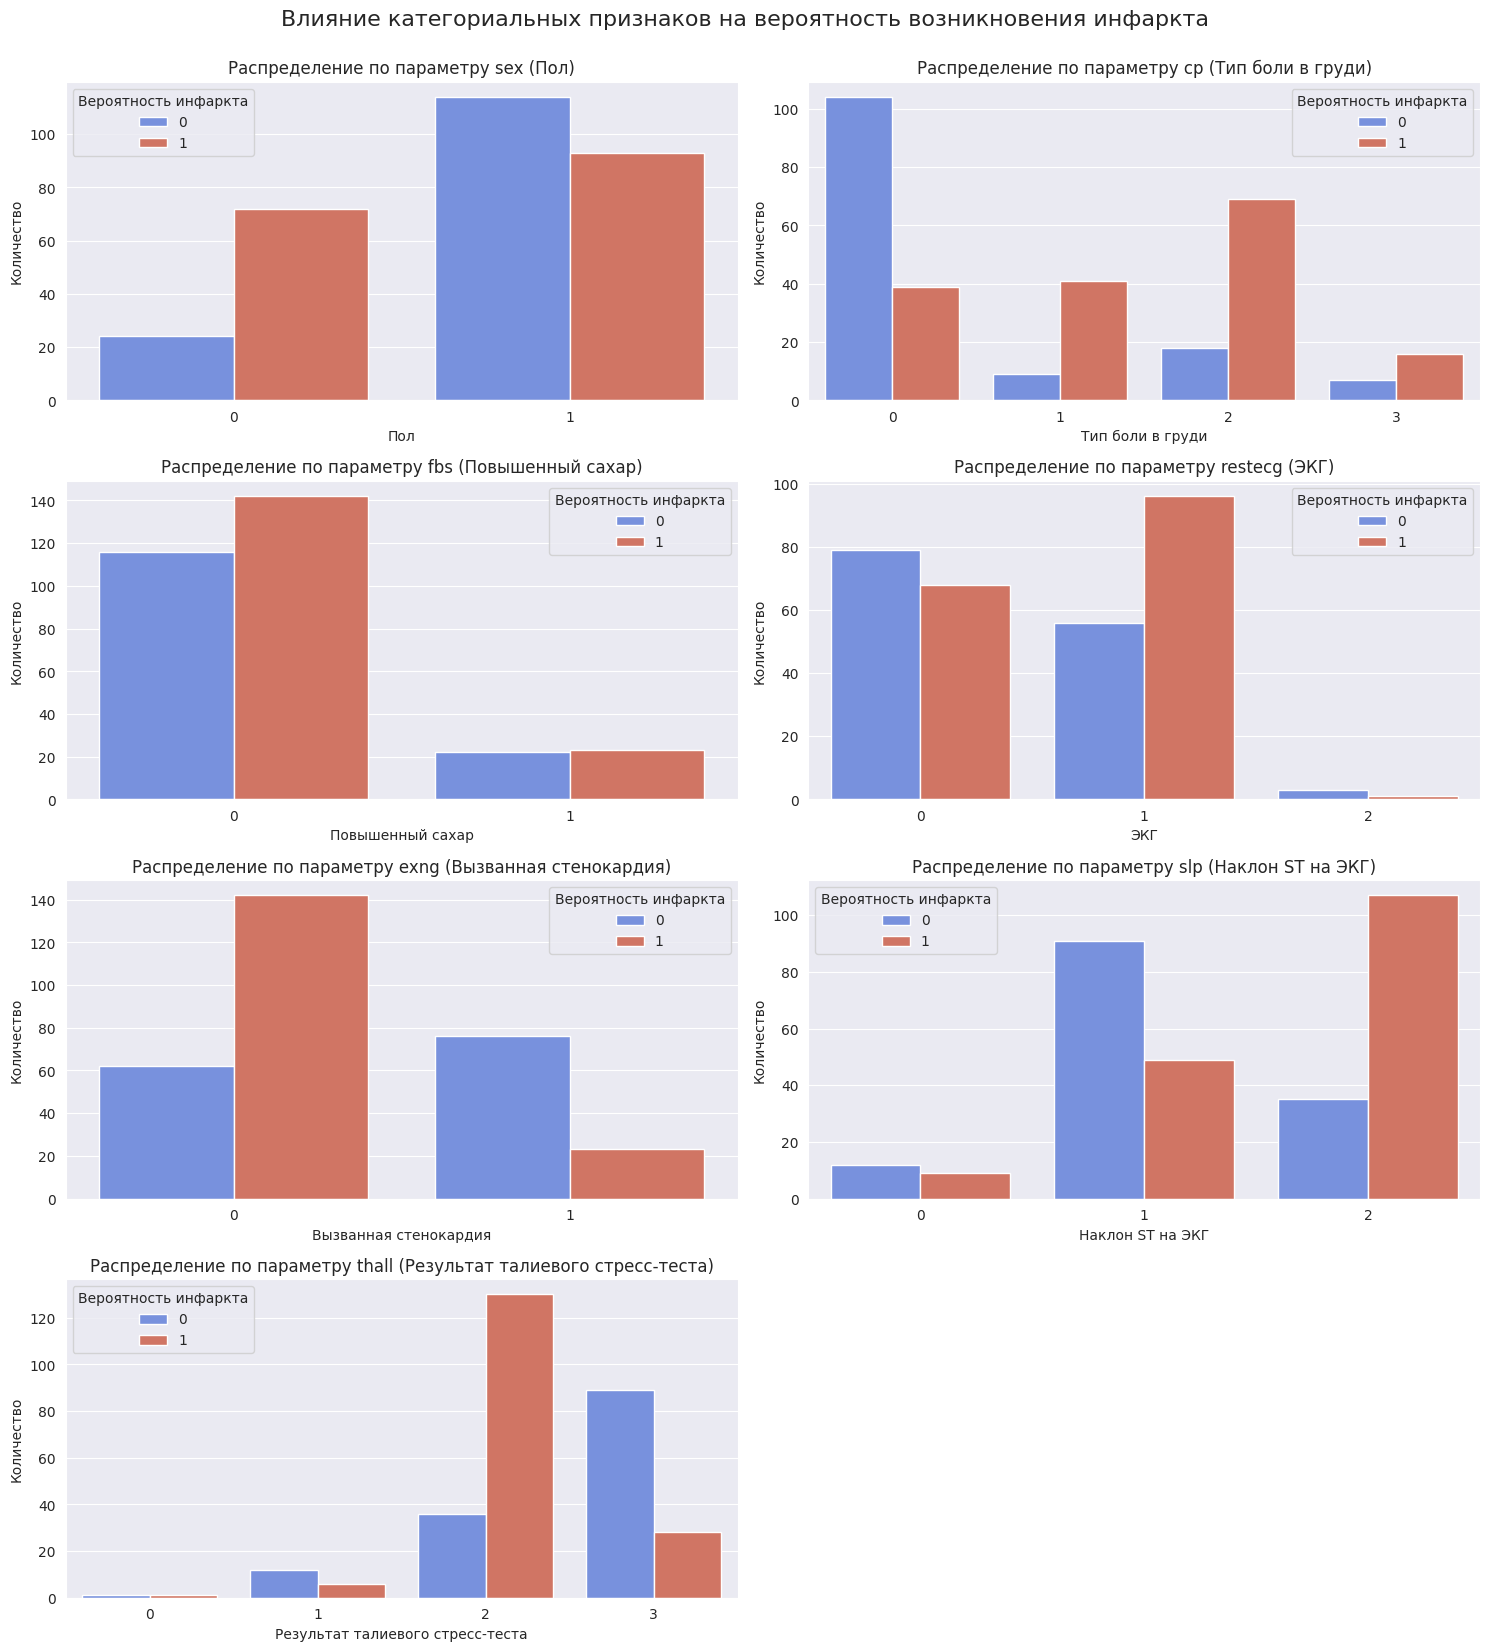

In [408]:
# Определяем категориальные признаки
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'thall']

# Округление до ближайшего четного числа
def even(n):
    return n + n % 2

# Создаем подграфики
fig, axes = plt.subplots(even(len(categorical_features)), 2, figsize=(15, 4*even(len(categorical_features))))
fig.suptitle('Влияние категориальных признаков на вероятность возникновения инфаркта', fontsize=16, y=1)

# Преобразуем axes в одномерный массив для удобства итерации
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    # Создаем график соотношений
    sns.countplot(data=df, x=feature, hue='output', ax=axes[i])

    # Настраиваем заголовок и метки осей
    axes[i].set_title(f'Распределение по параметру {feature} ({feature_labels[feature]})')
    axes[i].set_xlabel(feature_labels[feature])
    axes[i].set_ylabel('Количество')

    # Настраиваем легенду
    legend = axes[i].get_legend()
    legend.set_title('Вероятность инфаркта')
    for text in legend.get_texts():
        text.set_text(text.get_text())

# Удаляем лишние подграфики, если есть
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Линейная диаграмма показывает зависимость риска возникновения инфаркта людей разного пола одного возраста для более точного анализа.

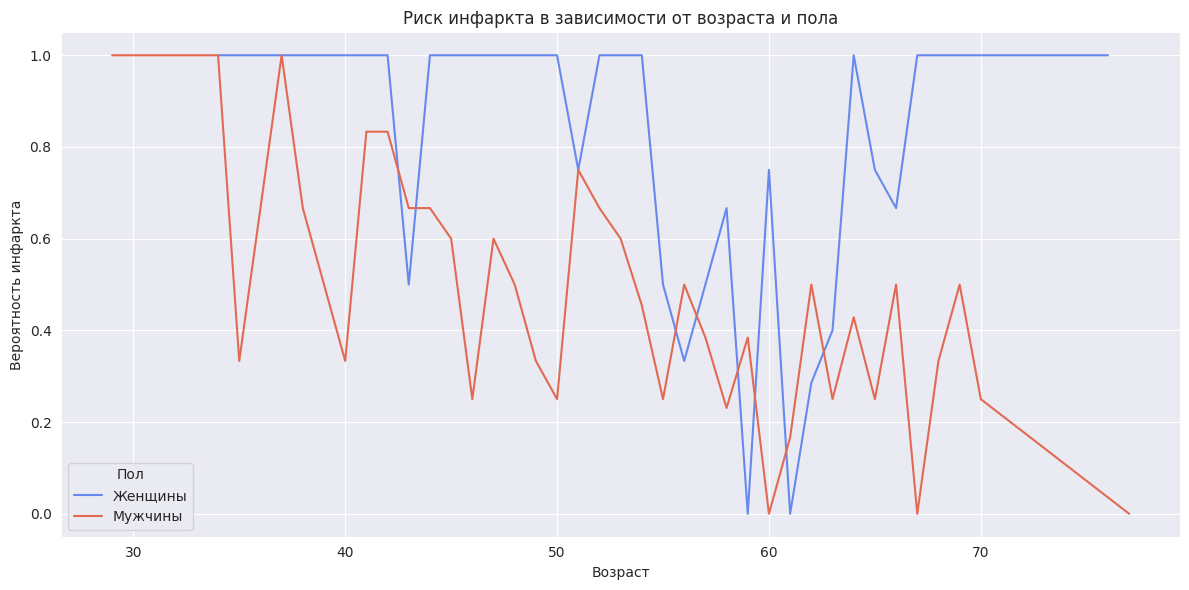

In [409]:
# Группируем данные
risk_by_age_sex = df.groupby(['age', 'sex'])['output'].mean().reset_index()

# Создаем график
plt.figure(figsize=(12, 6))
ax = sns.lineplot(risk_by_age_sex, x='age', y='output', hue='sex')

# Настраиваем подписи
plt.title('Риск инфаркта в зависимости от возраста и пола')
plt.xlabel('Возраст')
plt.ylabel('Вероятность инфаркта')

# Настраиваем легенду
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Женщины', 'Мужчины'], title='Пол')

plt.tight_layout()
plt.show()

# Предобработка данных

Удаляем слабо коррелирующие признаки:

In [410]:
# Создаем список хорошо коррелирующих признаков (>0.3)
high_correlation = ['thall', 'cp', 'oldpeak', 'exng', 'thalachh', 'slp', 'caa']

# Определяем числовые и категориальные признаки
numeric_features_hc = ['oldpeak', 'thalachh', 'caa']
categorical_features_hc = ['thall', 'cp', 'exng', 'slp']

# Оставляем в датасете только выбранные признаки и целевую переменную
df_hc = df[high_correlation + ['output']]
df_hc.head()

,thall,cp,oldpeak,exng,thalachh,slp,caa,output
0,1,3,2.3,0,150,0,0,1
1,2,2,3.5,0,187,0,0,1
2,2,1,1.4,0,172,2,0,1
3,2,1,0.8,0,178,2,0,1
4,2,0,0.6,1,163,2,0,1


Кодируем категориальные признаки и производим нормализацию на числовых признаках:

In [411]:
# Кодируем категориальные признаки
df_hc = pd.get_dummies(df_hc, columns=categorical_features_hc)
df_hc.head()

# Призводим нормализацию с помощью RobustScaler()
scaler = RobustScaler()
df_hc[numeric_features_hc] = scaler.fit_transform(df_hc[numeric_features_hc])
df_hc.head()

,oldpeak,thalachh,caa,output,thall_0,thall_1,thall_2,thall_3,cp_0,cp_1,cp_2,cp_3,exng_0,exng_1,slp_0,slp_1,slp_2
0,0.9375,-0.092308,0.0,1,False,True,False,False,False,False,False,True,True,False,True,False,False
1,1.6875,1.046154,0.0,1,False,False,True,False,False,False,True,False,True,False,True,False,False
2,0.3750,0.584615,0.0,1,False,False,True,False,False,True,False,False,True,False,False,False,True
3,0.0000,0.769231,0.0,1,False,False,True,False,False,True,False,False,True,False,False,False,True
4,-0.1250,0.307692,0.0,1,False,False,True,False,True,False,False,False,False,True,False,False,True


Разделяем данные на обучающую и тестовую выборки:

In [412]:
# Присваиваем переменные с признаками и целевую переменную
X, y = df[high_correlation], df['output']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение

Обучаем модели и сохраняем результаты обучения

In [413]:
# Определяе модели
models = [
    ('Logistic Regression', LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=1000)),
    ('Support Vector Machine', SVC(C=1, kernel='rbf')),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=10, criterion='entropy'))
]

# Инициализируем DataFrame для результатов
results = []

# Обучаем модель и сохраняем результаты
for name, model in models:
    model.fit(X_train, y_train)
    train_score = accuracy_score(y_train, model.predict(X_train))
    test_score = accuracy_score(y_test, model.predict(X_test))
    results.append({
        'name': name,
        'train_score': round(train_score, 4),
        'test_score': round(test_score, 4)
    })

# Создаем DataFrame с результатами
model_df = pd.DataFrame(results)

print(model_df)

                     name  train_score  test_score
0     Logistic Regression       0.8512      0.8852
1  Support Vector Machine       0.6777      0.6885
2           Decision Tree       1.0000      0.8197
3           Random Forest       0.9793      0.8033


Визуализируем результаты обучения

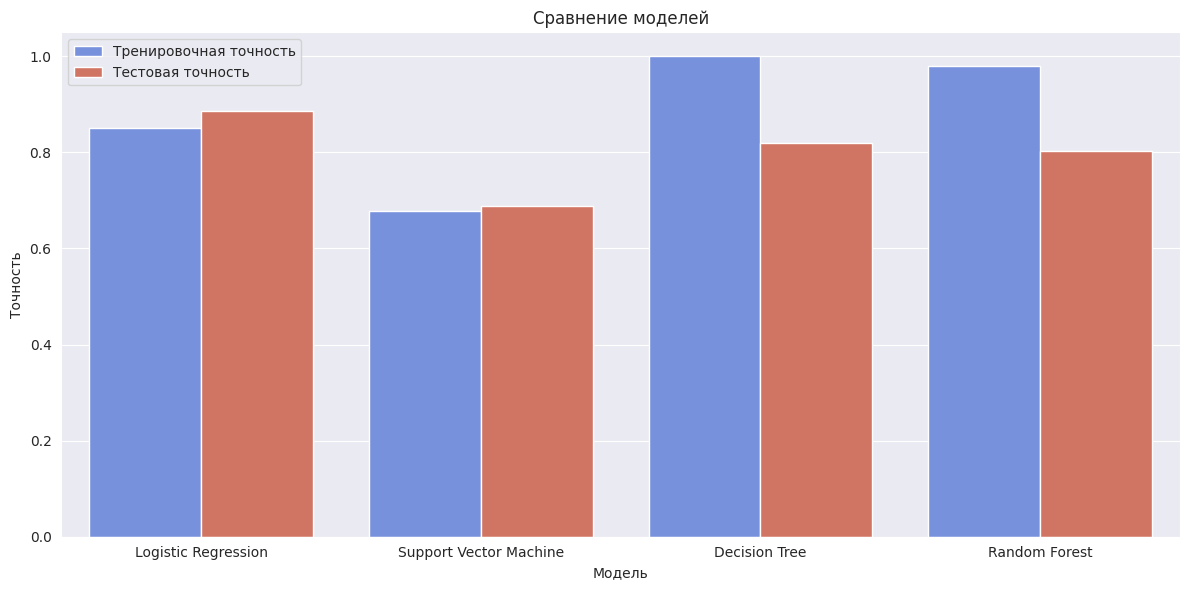

In [414]:
# Подготавливаем данные
df_melted = model_df.melt(id_vars=['name'], var_name='score_type', value_name='accuracy')

# Создаем график
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melted, x='name', y='accuracy', hue='score_type')

# Настраиваем подписи
plt.title('Сравнение моделей')
plt.xlabel('Модель')
plt.ylabel('Точность')

# Настраиваем легенду
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Тренировочная точность', 'Тестовая точность'], title=None)

plt.tight_layout()
plt.show()